In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dataset_utils as du

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Without ChaosFEX

In [72]:
import os
X = np.load(os.path.join(du.copy_base,'DATASET_bin_X.npy'))
y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
# X = X[:48]
# y = y[:48]

X_l = X[:323]
y_l = y[:323]
X_r = X[323:]
y_r = y[323:]
idx = np.random.choice(len(y_l), 280)
X_l = X_l[idx]
y_l = y_l[idx]
idx = np.random.choice(len(y_r), 280)
X_r = X_r[idx]
y_r = y_r[idx]
X = np.append(X_l, X_r, axis=0)
y = np.append(y_l, y_r)
print(X.shape, y.shape)

# pca_32 = PCA(n_components=32)

# X = pca_32.fit_transform(X=X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(560, 124044) (560,)
(375, 124044) (185, 124044) (375,) (185,)


starting epoch 1
end of epoch 1
starting epoch 2
end of epoch 2
starting epoch 3
end of epoch 3
starting epoch 4
end of epoch 4
starting epoch 5
end of epoch 5
starting epoch 6
end of epoch 6
starting epoch 7
end of epoch 7
starting epoch 8
end of epoch 8
starting epoch 9
end of epoch 9
starting epoch 10
end of epoch 10
Classification report for thee classifier: SVC(gamma=0.001)
               precision    recall  f1-score   support

           3       0.85      1.00      0.92        93
          22       1.00      0.83      0.90        92

    accuracy                           0.91       185
   macro avg       0.93      0.91      0.91       185
weighted avg       0.93      0.91      0.91       185
 



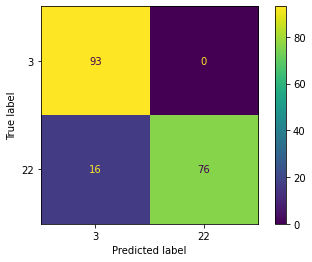

In [73]:
classifier = svm.SVC(gamma=0.001)
for iter in range(10):
    print(f"starting epoch {iter+1}")
    classifier.fit(X_train, y_train)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    print(f"end of epoch {iter+1}")


predicted = classifier.predict(X_test)

print("Classification report for thee classifier: %s\n %s \n" %(classifier, metrics.classification_report(y_test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)

## With ChaosFEX

In [3]:
import os
X = np.load(os.path.join(du.copy_base,'DATASET_toy_bin_X.npy'))
y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
# X = X[:48]
# y = y[:48]

X_l = X[:323]
y_l = y[:323]
X_r = X[323:]
y_r = y[323:]
idx = np.random.choice(len(y_l), 280)
X_l = X_l[idx]
y_l = y_l[idx]
idx = np.random.choice(len(y_r), 280)
X_r = X_r[idx]
y_r = y_r[idx]
X = np.append(X_l, X_r, axis=0)
y = np.append(y_l, y_r)
print(X.shape, y.shape)


# pca_32 = PCA(n_components=32)

# X = pca_32.fit_transform(X=X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(560, 496176) (560,)
(375, 496176) (185, 496176) (375,) (185,)


starting epoch 1
end of epoch 1
starting epoch 2
end of epoch 2
starting epoch 3
end of epoch 3
starting epoch 4
end of epoch 4
starting epoch 5
end of epoch 5
starting epoch 6
end of epoch 6
starting epoch 7
end of epoch 7
starting epoch 8
end of epoch 8
starting epoch 9
end of epoch 9
starting epoch 10
end of epoch 10
Classification report for thee classifier: SVC(kernel='linear')
               precision    recall  f1-score   support

           3       0.90      0.95      0.93        99
          22       0.94      0.88      0.91        86

    accuracy                           0.92       185
   macro avg       0.92      0.92      0.92       185
weighted avg       0.92      0.92      0.92       185
 



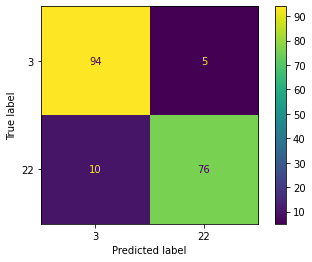

In [4]:
classifier = svm.SVC(kernel='linear')
for iter in range(10):
    print(f"starting epoch {iter+1}")
    classifier.fit(X_train, y_train)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    print(f"end of epoch {iter+1}")
predicted = classifier.predict(X_test)

print("Classification report for thee classifier: %s\n %s \n" %(classifier, metrics.classification_report(y_test, predicted)))

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)

# Celtic Compositions as Test Set

Here, we'll use Celtic compositions as test set and see how they get classified.

## Without ChaosFEX

In [5]:
X = np.load(os.path.join(du.copy_base,'DATASET_bin_X.npy'))
y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
# X = X[:48]
# y = y[:48]

X_l = X[:323]
y_l = y[:323]
X_r = X[323:]
y_r = y[323:]
idx = np.random.choice(len(y_l), 280)
X_l = X_l[idx]
y_l = y_l[idx]
idx = np.random.choice(len(y_r), 280)
X_r = X_r[idx]
y_r = y_r[idx]
X = np.append(X_l, X_r, axis=0)
y = np.append(y_l, y_r)
print(X.shape, y.shape)

# pca_32 = PCA(n_components=32)

# X = pca_32.fit_transform(X=X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
X_train = X
y_train = y
X_test = np.load(os.path.join(du.copy_base,'DATASET_only_Celtic_X.npy'))
print(X_train.shape, X_test.shape, y_train.shape)

(560, 124044) (560,)
(560, 124044) (70, 124044) (560,)


In [6]:
classifier = svm.SVC(gamma=0.001)
for iter in range(10):
    print(f"starting epoch {iter+1}")
    classifier.fit(X_train, y_train)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    print(f"end of epoch {iter+1}")

predicted = classifier.predict(X_test)

count = 0
for i in range(len(predicted)):
    if predicted[i] == 22:
        count += 1
print(count, len(predicted))

starting epoch 1
end of epoch 1
starting epoch 2
end of epoch 2
starting epoch 3
end of epoch 3
starting epoch 4
end of epoch 4
starting epoch 5
end of epoch 5
starting epoch 6
end of epoch 6
starting epoch 7
end of epoch 7
starting epoch 8
end of epoch 8
starting epoch 9
end of epoch 9
starting epoch 10
end of epoch 10
70 185


## With ChaosFEX

In [69]:
X = np.load(os.path.join(du.copy_base,'DATASET_toy_bin_X.npy'))
y = np.load(os.path.join(du.copy_base,'DATASET_bin_Y.npy'))
# X = X[:48]
# y = y[:48]

X_l = X[:323]
y_l = y[:323]
X_r = X[323:]
y_r = y[323:]
idx = np.random.choice(len(y_l), 280)
X_l = X_l[idx]
y_l = y_l[idx]
idx = np.random.choice(len(y_r), 280)
X_r = X_r[idx]
y_r = y_r[idx]
X = np.append(X_l, X_r, axis=0)
y = np.append(y_l, y_r)
print(X.shape, y.shape)

# pca_32 = PCA(n_components=32)

# X = pca_32.fit_transform(X=X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
X_train = X
y_train = y
X_test = np.load(os.path.join(du.copy_base,'DATASET_only_Celtic_CFX_X.npy'))
print(X_train.shape, X_test.shape, y_train.shape)

(560, 496176) (560,)
(560, 496176) (70, 496176) (560,)


In [70]:
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

count = 0
for i in range(len(predicted)):
    if predicted[i] == 22:
        count += 1
print(count, len(predicted))

0 70


# SVM with ChaosFEX on a dataset with varying epsilon values
